In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

# **Display images and ground truth masks**
The data has 5 sets of 1000 images and corresponding labels.

In [2]:
def plot_images_and_masks(data_folder):
    subfolders = ['dataA', 'dataB', 'dataC', 'dataD', 'dataE']
    num_images_to_plot = 3

    for subfolder in subfolders:
        image_subfolder_path = os.path.join(data_folder, subfolder, subfolder, 'CameraRGB')
        mask_subfolder_path = os.path.join(data_folder, subfolder, subfolder, 'CameraSeg')

        image_files = os.listdir(image_subfolder_path) 
        mask_files = os.listdir(mask_subfolder_path)

        # print(len(image_files))
        # print(len(mask_files))

        for i in range(num_images_to_plot):
            image_path = os.path.join(image_subfolder_path, image_files[i])
            mask_path = os.path.join(mask_subfolder_path, mask_files[i])

            image = cv2.imread(image_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(f'Image {i+1} - Subfolder: {subfolder}')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(mask)  # Display mask in grayscale
            plt.title(f'Mask {i+1} - Subfolder: {subfolder}')
            plt.axis('off')

            plt.show()


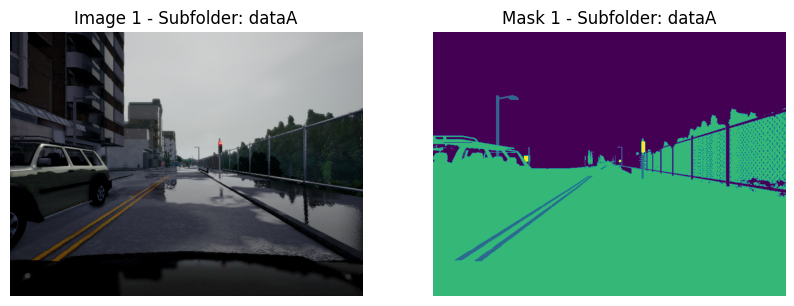

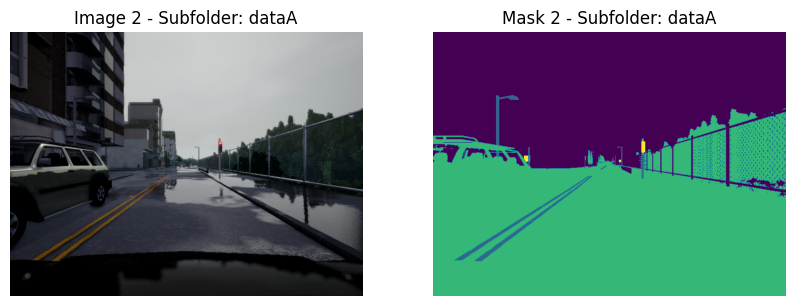

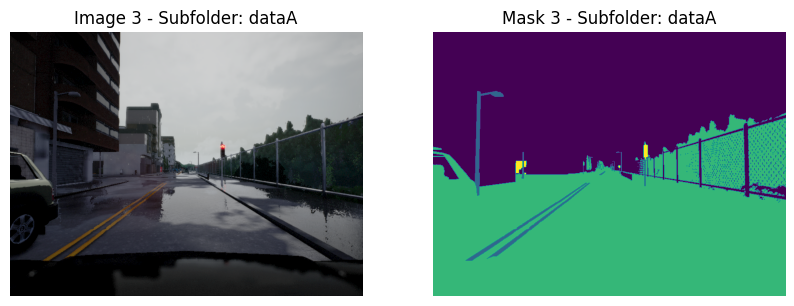

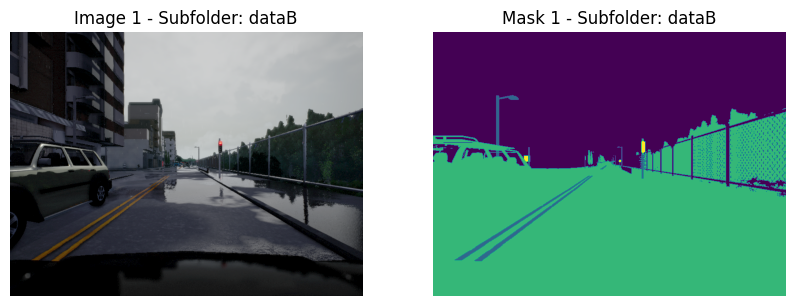

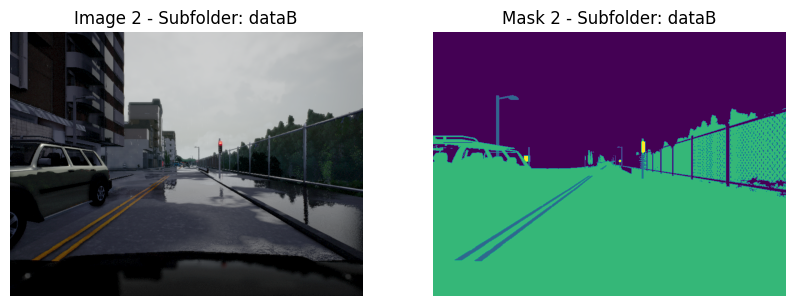

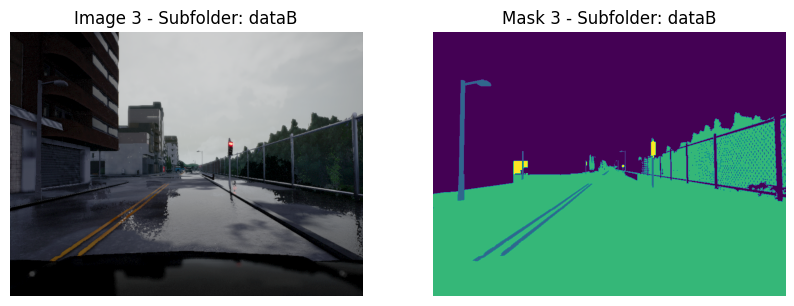

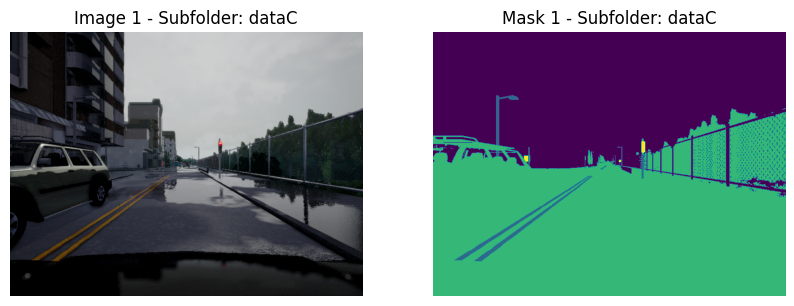

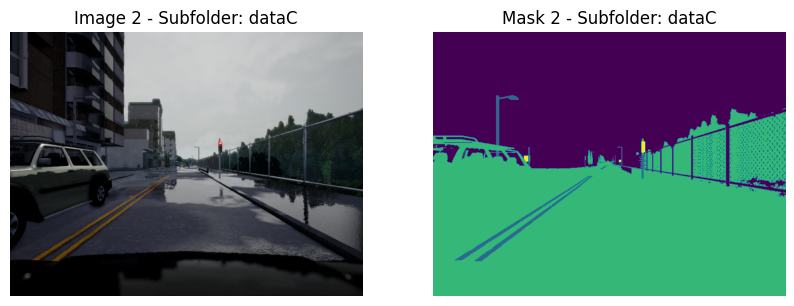

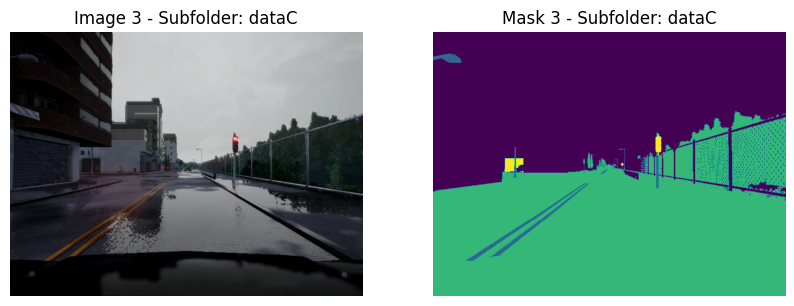

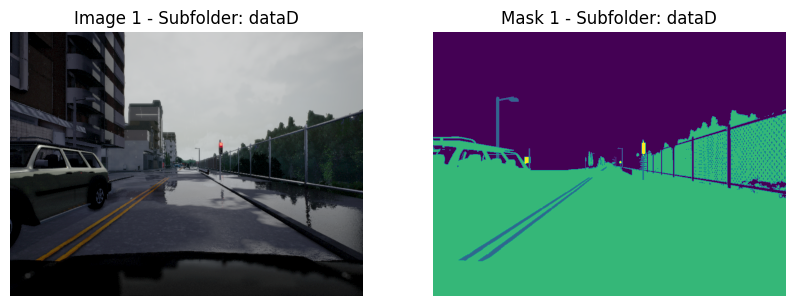

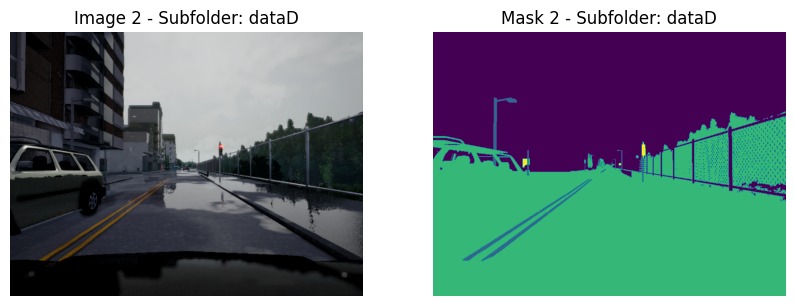

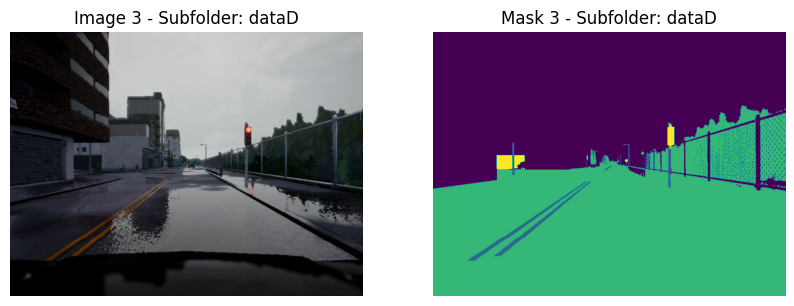

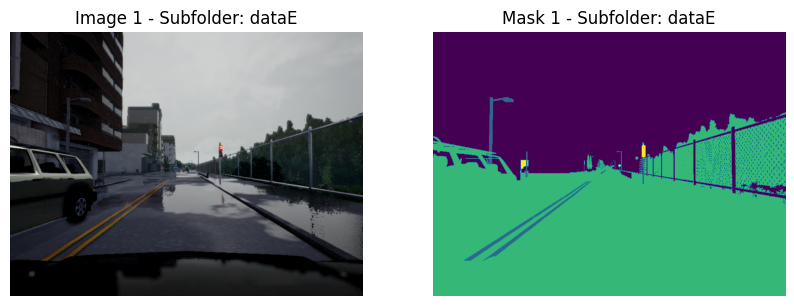

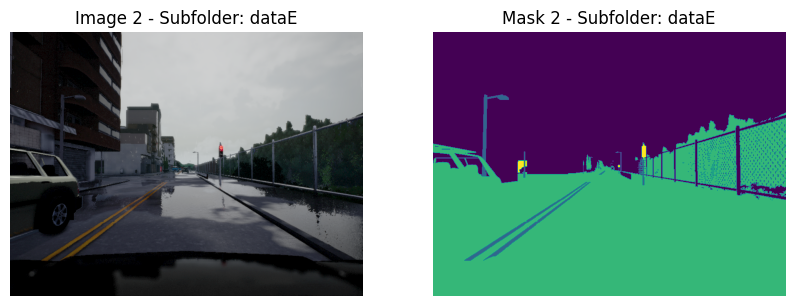

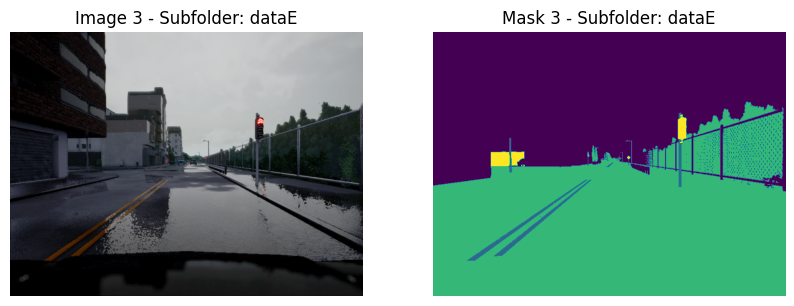

In [3]:
data_folder = "F:\Coding\Sematic_Segmentation_U-net_Autonomus_Driving\Data\Dataset"  #Replace with the path to the parent data folder
plot_images_and_masks(data_folder)

# Storing images and masks in a list

In [10]:
images_list = []
masks_list = []
def store_imgs_masks(data):
    images_list.append(glob.glob('F:\\Coding\\Sematic_Segmentation_U-net_Autonomus_Driving\\Data\Dataset\\' + data + '\\' + data + '\\CameraRGB\\*.png'))
    masks_list.append(glob.glob('F:\\Coding\\Sematic_Segmentation_U-net_Autonomus_Driving\\Data\\Dataset\\'+ data +'\\'+ data +'\\CameraSeg\\*.png'))


In [11]:
store_imgs_masks('dataA')
store_imgs_masks('dataB')
store_imgs_masks('dataC')
store_imgs_masks('dataD')
store_imgs_masks('dataE')

In [12]:
def get_one_list(list_of_lists):
    
    one_list = []

    for sublist in list_of_lists:
        one_list.extend(sublist)
    return one_list

In [13]:
images_list = get_one_list(images_list)
masks_list = get_one_list(masks_list)